In [1]:
from fastai import *
from fastai.vision.all import *

In [2]:
path = Path();path

Path('.')

In [3]:
path.ls()

(#12) [Path('.ipynb_checkpoints'),Path('export.pkl'),Path('label.txt'),Path('label_rename.txt'),Path('models'),Path('PDD271_sample - Jupyter Notebook.pdf'),Path('PDD271_sample.ipynb'),Path('Sample'),Path('Sample.zip'),Path('test_list.txt')...]

In [4]:
label_file = (path/'label.txt')

In [5]:
with open(label_file) as file:
    lines = file.readlines()
coding_dict = {int(x[-4:-1]):x[:-5] for x in lines}
coding_dict

{100: 'Pumpkin virus disease',
 101: 'Pumpkin powdery mildew',
 102: 'Pumpkin downy mildew',
 103: 'Leaf Mustard Healthy',
 104: 'Sunflower bacterial leaf spot',
 105: 'Sunflower Black Spot',
 106: 'Chinese cabbage gray spot',
 107: 'Chinese cabbage anthracnose',
 108: 'Chinese cabbage blight',
 109: 'Chinese cabbage virus disease',
 110: 'White spot disease of Chinese cabbage',
 111: 'Bacterial brown spot disease of Chinese cabbage',
 112: 'Chinese cabbage bacterial black spot',
 113: 'Magnesium deficiency in Chinese cabbage',
 114: 'Chinese cabbage poisoning',
 115: 'Chinese cabbage downy mildew',
 116: 'Chinese cabbage black spot',
 117: 'Chinese cabbage black rot',
 118: 'Soybean leaf blight',
 119: 'Soybean sunburn',
 120: 'Soybean gray spot',
 121: 'Soybean Botrytis',
 122: 'Soybean anthracnose',
 123: 'Soybean soot',
 124: 'Soybean blight',
 125: 'Soybean virus disease',
 126: 'Bacterial spot disease of soybean',
 127: 'Soybean nitrogen deficiency',
 128: 'Magnesium deficiency i

In [6]:
def directory_files(dirct: Path) -> list:
    Lf = []
    if dirct.is_dir():
        for d in dirct.iterdir():
            Lf.extend(directory_files(d))
    else:
        Lf.append(str(dirct))   
    return Lf

In [7]:
fname = directory_files(path/'Sample')

In [8]:
labels = [coding_dict[int(Path(x).parent.name)] for x in fname]; labels

['Pumpkin virus disease',
 'Pumpkin virus disease',
 'Pumpkin virus disease',
 'Pumpkin virus disease',
 'Pumpkin virus disease',
 'Pumpkin virus disease',
 'Pumpkin virus disease',
 'Pumpkin virus disease',
 'Pumpkin virus disease',
 'Pumpkin virus disease',
 'Pumpkin powdery mildew',
 'Pumpkin powdery mildew',
 'Pumpkin powdery mildew',
 'Pumpkin powdery mildew',
 'Pumpkin powdery mildew',
 'Pumpkin powdery mildew',
 'Pumpkin powdery mildew',
 'Pumpkin powdery mildew',
 'Pumpkin powdery mildew',
 'Pumpkin powdery mildew',
 'Pumpkin downy mildew',
 'Pumpkin downy mildew',
 'Pumpkin downy mildew',
 'Pumpkin downy mildew',
 'Pumpkin downy mildew',
 'Pumpkin downy mildew',
 'Pumpkin downy mildew',
 'Pumpkin downy mildew',
 'Pumpkin downy mildew',
 'Pumpkin downy mildew',
 'Leaf Mustard Healthy',
 'Leaf Mustard Healthy',
 'Leaf Mustard Healthy',
 'Leaf Mustard Healthy',
 'Leaf Mustard Healthy',
 'Leaf Mustard Healthy',
 'Leaf Mustard Healthy',
 'Leaf Mustard Healthy',
 'Leaf Mustard Healt

In [9]:
len(fname)==len(labels)

True

In [10]:
df = pd.DataFrame()
df['fname'] = fname
df['labels']= labels
df

,fname,labels
0,Sample/100/DSC05819.JPG,Pumpkin virus disease
1,Sample/100/DSC05982.JPG,Pumpkin virus disease
2,Sample/100/DSC06018.JPG,Pumpkin virus disease
3,Sample/100/DSC06024.JPG,Pumpkin virus disease
4,Sample/100/DSC06040.JPG,Pumpkin virus disease
...,...,...
10160,Sample/370/DSC01268.JPG,Cucumber black spot
10161,Sample/370/DSC01489.JPG,Cucumber black spot
10162,Sample/370/DSC01512.JPG,Cucumber black spot
10163,Sample/370/DSC01536.JPG,Cucumber black spot


# Create a datablock

In [14]:
dls = ImageDataLoaders.from_df(df, 
                               path,
                               item_tfms=Resize(256), 
                               batch_tfms=Normalize.from_stats(*imagenet_stats),
                               bs=16,
                              )

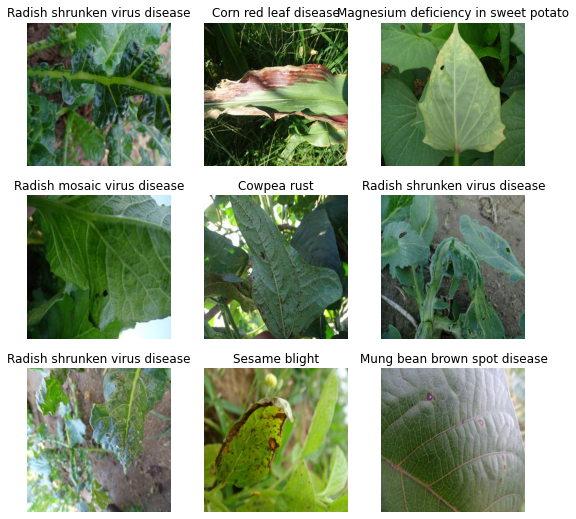

In [15]:
dls.show_batch()

In [16]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)

/home/akmal/anaconda3/envs/fastai/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448255797/work/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [ ]:
learn.lr_find()

In [17]:
learn.lr = 1e-2
learn.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,time
0,1.881921,1.353763,0.748155,00:15


epoch,train_loss,valid_loss,accuracy,time
0,1.263311,1.071999,0.779636,00:21
1,0.974307,0.887706,0.804722,00:21
2,0.664639,0.665900,0.843089,00:21
3,0.278602,0.551474,0.872602,00:21
4,0.143781,0.532256,0.873094,00:21


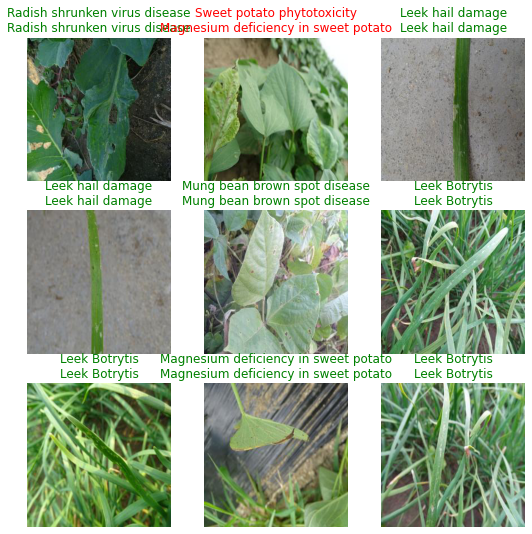

In [29]:
learn.show_results()

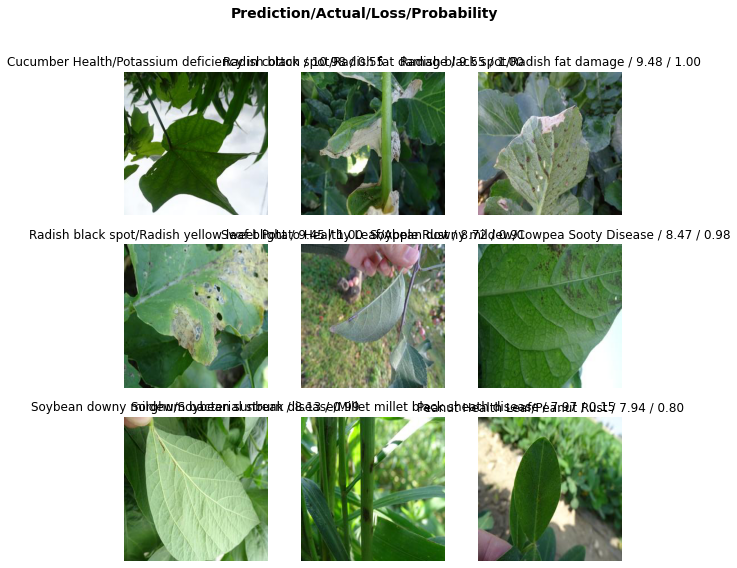

In [30]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(9)

In [ ]:
learn.export()